In [91]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 

In [92]:
sns.set_style('whitegrid')

In [93]:
data=pd.read_excel(r"C:\Users\Hp\Desktop\monte_carlo.xlsx")
data

,A,h,phi,Bo,Rf,Swi
0,490,90,0.16,1.105,30,0.17
1,490,100,0.17,1.105,31,0.18
2,500,110,0.16,1.105,32,0.17
3,510,110,0.16,1.106,34,0.19
4,510,100,0.16,1.107,35,0.19
5,510,110,0.16,1.108,36,0.19
6,510,110,0.17,1.107,35,0.18
7,500,100,0.15,1.105,35,0.17
8,500,110,0.16,1.106,36,0.17
9,530,100,0.16,1.106,35,0.16


In [94]:
data['estimate']=7758*(data['A']*data['phi']*data['Bo']*data['Rf']*(1-data['Swi']))/(data['h'])
data

,A,h,phi,Bo,Rf,Swi,estimate
0,490,90,0.16,1.105,30,0.17,185945.192160
1,490,100,0.17,1.105,31,0.18,181523.393087
2,500,110,0.16,1.105,32,0.17,165591.265745
3,510,110,0.16,1.106,34,0.19,175293.701526
4,510,100,0.16,1.107,35,0.19,198673.808962
5,510,110,0.16,1.108,36,0.19,185940.728818
6,510,110,0.17,1.107,35,0.18,194269.984352
7,500,100,0.15,1.105,35,0.17,186775.304625
8,500,110,0.16,1.106,36,0.17,186458.762356
9,530,100,0.16,1.106,35,0.16,213918.372058


In [95]:
data.corr()

,A,h,phi,Bo,Rf,Swi,estimate
A,1.000000,0.269680,-0.083045,0.536656,0.641285,-0.044499,0.657880
h,0.269680,1.000000,0.167968,0.452267,0.551625,0.330017,-0.341964
phi,-0.083045,0.167968,1.000000,0.185695,-0.266279,0.240206,0.023630
Bo,0.536656,0.452267,0.185695,1.000000,0.692255,0.597022,0.362571
Rf,0.641285,0.551625,-0.266279,0.692255,1.000000,0.182045,0.423759
Swi,-0.044499,0.330017,0.240206,0.597022,0.182045,1.000000,-0.243629
estimate,0.657880,-0.341964,0.023630,0.362571,0.423759,-0.243629,1.000000


In [96]:
data.describe().round(2)

,A,h,phi,Bo,Rf,Swi,estimate
count,10.00,10.00,10.00,10.00,10.00,10.00,10.00
mean,505.00,104.00,0.16,1.11,33.90,0.18,187439.05
std,11.79,6.99,0.01,0.00,2.13,0.01,13079.86
min,490.00,90.00,0.15,1.10,30.00,0.16,165591.27
25%,500.00,100.00,0.16,1.10,32.50,0.17,182627.73
50%,505.00,105.00,0.16,1.11,35.00,0.18,186201.98
75%,510.00,110.00,0.16,1.11,35.00,0.19,192396.31
max,530.00,110.00,0.17,1.11,36.00,0.19,213918.37


Text(0.5, 1.0, 'Reserve estimate')

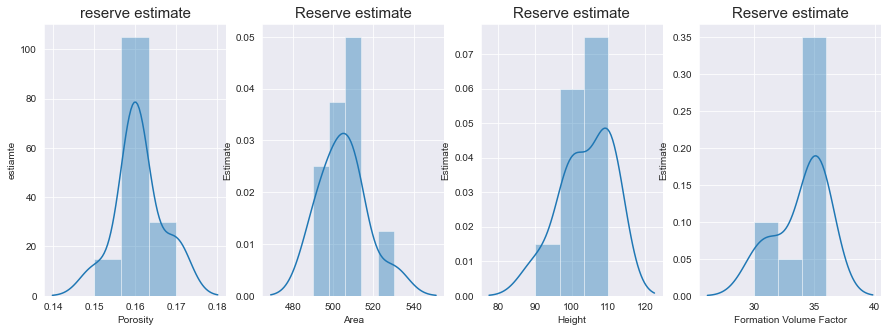

In [110]:
fig,(ax1,ax2,ax3,ax4)=plt.subplots(1,4,figsize=(15,5)) #To obtain side-by-side subplots, pass parameters 1, 2 for one row and two columns.
#plt.subplots(1,2) is 1 is number of rows and 2 is number of columns
ax1 = sns.distplot(data["phi"],ax=ax1)
sns.set_style("darkgrid")
ax1.set_xlabel("Porosity",fontsize=10)
ax1.set_ylabel("estiamte",fontsize=10)
ax1.set_title("reserve estimate",fontsize=15)

ax2=sns.distplot(data["A"],ax=ax2)
ax2.set_xlabel("Area",fontsize=10)
ax2.set_ylabel("Estimate",fontsize=10)
ax2.set_title("Reserve estimate",fontsize=15)

ax3=sns.distplot(data["h"],ax=ax3)
ax3.set_xlabel("Height",fontsize=10)
ax3.set_ylabel("Estimate",fontsize=10)
ax3.set_title("Reserve estimate",fontsize=15)

ax4=sns.distplot(data["Rf"],ax=ax4)
ax4.set_xlabel("Formation Volume Factor",fontsize=10)
ax4.set_ylabel("Estimate",fontsize=10)
ax4.set_title("Reserve estimate",fontsize=15)



In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn import tree

In [15]:
# declare X (Predictor) and y(Target)
X = data.iloc[:,:-1]
y = data.iloc[:, -1]

In [16]:
#Create training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [17]:
#Create the regressor: reg
reg = LinearRegression()

In [18]:
#Fit the regressor to the training data
reg.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [19]:
# Predict on the test data: y_pred
y_pred = reg.predict(X_test)

In [20]:
# Compute and print RMSE
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error: {}".format(rmse))

Root Mean Squared Error: 1802.2778029834826


In [21]:
print('Variance score: %.2f' % reg.score(X_test, y_test)) 

Variance score: 0.89


In [24]:
print("R2 score : %.2f" % r2_score(y_test,y_pred))

R2 score : 0.89
